# for problems

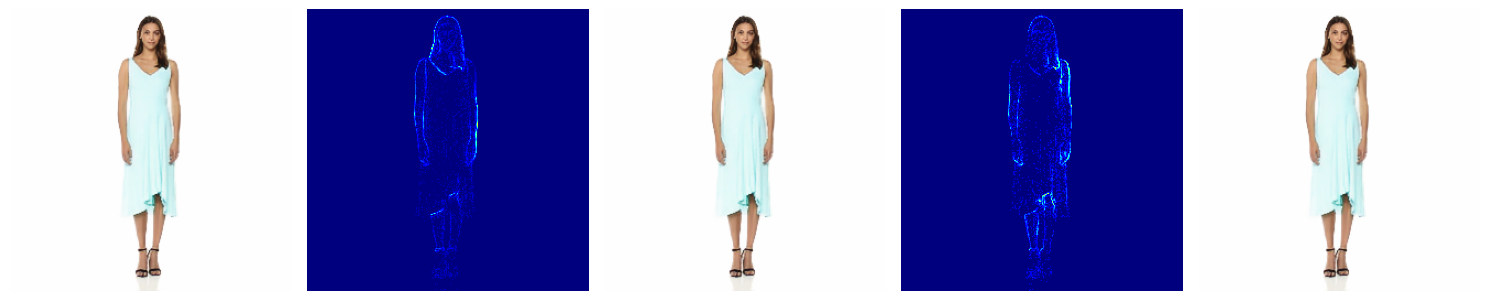

In [98]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# video_list = ['91-3003CN5S.mp4', ]
# Specify the paths of the two images

# image_path1 = '/ssd5/tongkai/gen_fashion/mybdmm/images/A1nR9+HvtBS.mp4/frame_00010.png'
# image_path2 = '/ssd5/tongkai/gen_fashion/mybdmm/images/A1nR9+HvtBS.mp4/frame_00011.png'
# image_path3 = '/ssd5/tongkai/gen_fashion/mybdmm/images/A1nR9+HvtBS.mp4/frame_00012.png'

# image_path1 = '/ssd5/tongkai/gen_fashion/nted_old/images/A1nR9+HvtBS.mp4/frame_00010.png'
# image_path2 = '/ssd5/tongkai/gen_fashion/nted_old/images/A1nR9+HvtBS.mp4/frame_00011.png'
# image_path3 = '/ssd5/tongkai/gen_fashion/nted_old/images/A1nR9+HvtBS.mp4/frame_00012.png'

image_path1 = '/ssd5/tongkai/gen_fashion/fp_new/images/A1nR9+HvtBS.mp4/images0010.png'
image_path2 = '/ssd5/tongkai/gen_fashion/fp_new/images/A1nR9+HvtBS.mp4/images0011.png'
image_path3 = '/ssd5/tongkai/gen_fashion/fp_new/images/A1nR9+HvtBS.mp4/images0012.png'

# image_path1 = '/ssd5/tongkai/FashionVideo/test/A1nR9+HvtBS.mp4/frames/frame_00010.png'
# image_path2 = '/ssd5/tongkai/FashionVideo/test/A1nR9+HvtBS.mp4/frames/frame_00011.png'
# image_path3 = '/ssd5/tongkai/FashionVideo/test/A1nR9+HvtBS.mp4/frames/frame_00012.png'

# Load the images
image1 = np.array(Image.open(image_path1))
image2 = np.array(Image.open(image_path2))
image3 = np.array(Image.open(image_path3))
# print(image1.shape)
image1_gray = np.array(Image.open(image_path1).convert('L')).astype(np.float32)
image2_gray = np.array(Image.open(image_path2).convert('L')).astype(np.float32)
image3_gray = np.array(Image.open(image_path3).convert('L')).astype(np.float32)

# Calculate the absolute difference between the two images
diff_gray1 = np.abs(image1_gray - image2_gray)*7
diff_gray2 = np.abs(image2_gray - image3_gray)*7
# vmin = 0
# vmax = 255
# print(diff_gray1.min(), diff_gray1.max())
# print(diff_gray2.min(), diff_gray2.max())

# Plotting
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # Adjust figure size as needed

# Display the first image, grayscale difference between image1 and image2, and second image
axes[0].imshow(image1)
axes[0].axis('off')
# axes[0].set_title('Image 1')

axes[1].imshow(diff_gray1, cmap='jet')
axes[1].axis('off')
# axes[1].set_title('Diff 1')

axes[2].imshow(image2)
axes[2].axis('off')
# axes[2].set_title('Image 2')

# Display grayscale difference between image2 and image3 and third image
axes[3].imshow(diff_gray2, cmap='jet')
axes[3].axis('off')
# axes[3].set_title('Diff 2')

axes[4].imshow(image3)
axes[4].axis('off')
# axes[4].set_title('Image 3')

plt.tight_layout()
plt.show()
# fig = plt.figure(figsize=(10, 10))
# ax1 = fig.add_subplot(221)
# Plot the difference image
# plt.figure(figsize=(6, 6))
# plt.imshow(diff_gray, cmap='jet')
# plt.axis('off')
# cbar = plt.colorbar()
# cbar.set_ticks([])
# plt.show()


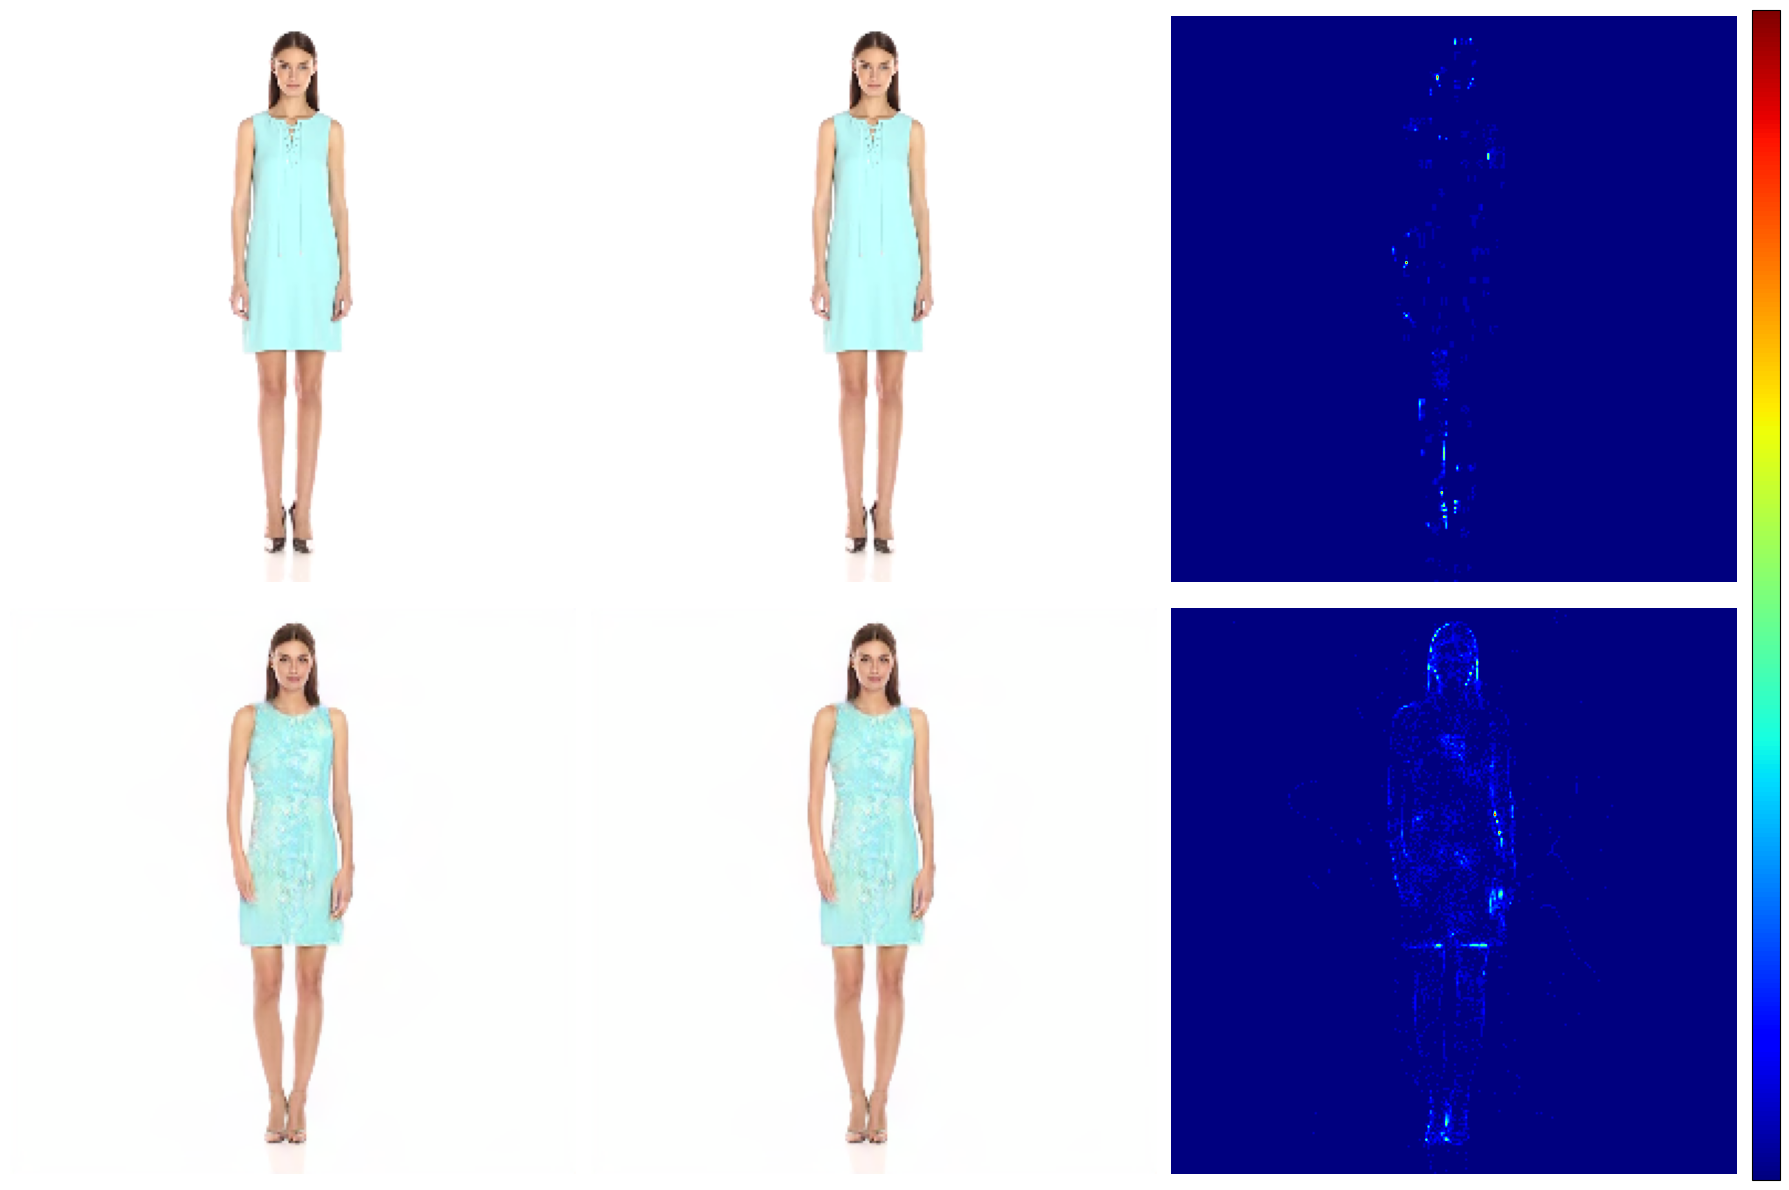

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Specify the paths of the two images
image_path1 = '/ssd5/tongkai/gen_fashion/nted_old/images/91-3003CN5S.mp4/frame_00000.png'
image_path2 = '/ssd5/tongkai/gen_fashion/nted_old/images/91-3003CN5S.mp4/frame_00001.png'
ori_image_path1 = '/ssd5/tongkai/FashionVideo/test/91-3003CN5S.mp4/frames/frame_00000.png'
ori_image_path2 = '/ssd5/tongkai/FashionVideo/test/91-3003CN5S.mp4/frames/frame_00001.png'

# Load the images
image1 = np.array(Image.open(image_path1))
image2 = np.array(Image.open(image_path2))
image1_gray = np.array(Image.open(image_path1).convert('L')).astype(np.float32)
image2_gray = np.array(Image.open(image_path2).convert('L')).astype(np.float32)
ori_image1 = np.array(Image.open(ori_image_path1))
ori_image2 = np.array(Image.open(ori_image_path2))
ori_image1_gray = np.array(Image.open(ori_image_path1).convert('L')).astype(np.float32)
ori_image2_gray = np.array(Image.open(ori_image_path2).convert('L')).astype(np.float32)

# Calculate the absolute difference between the two images
diff_gray = np.abs(image1_gray - image2_gray)
diff_ori_gray = np.abs(ori_image1_gray - ori_image2_gray)

# Set values below the threshold to zero
threshold = 0
diff_gray[diff_gray < threshold] = 0
diff_ori_gray[diff_ori_gray < threshold] = 0

# Create a figure with GridSpec to manually control the colorbar position
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05])  # Last column for colorbar

# Plot images in their respective subplots
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(ori_image1)
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(ori_image2)
ax2.axis('off')

ax3 = fig.add_subplot(gs[0, 2])
im1 = ax3.imshow(diff_ori_gray, cmap='jet')
ax3.axis('off')

ax4 = fig.add_subplot(gs[1, 0])
ax4.imshow(image1)
ax4.axis('off')

ax5 = fig.add_subplot(gs[1, 1])
ax5.imshow(image2)
ax5.axis('off')

ax6 = fig.add_subplot(gs[1, 2])
im2 = ax6.imshow(diff_gray, cmap='jet')
ax6.axis('off')

# Add a colorbar to the right of the entire figure, spanning both rows
cbar_ax = fig.add_subplot(gs[:, 3])  # Use the entire right column for the colorbar
cbar = fig.colorbar(im2, cax=cbar_ax, orientation='vertical')
cbar.set_ticks([])
# cbar.set_label('Intensity')  # Optional: label for colorbar

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


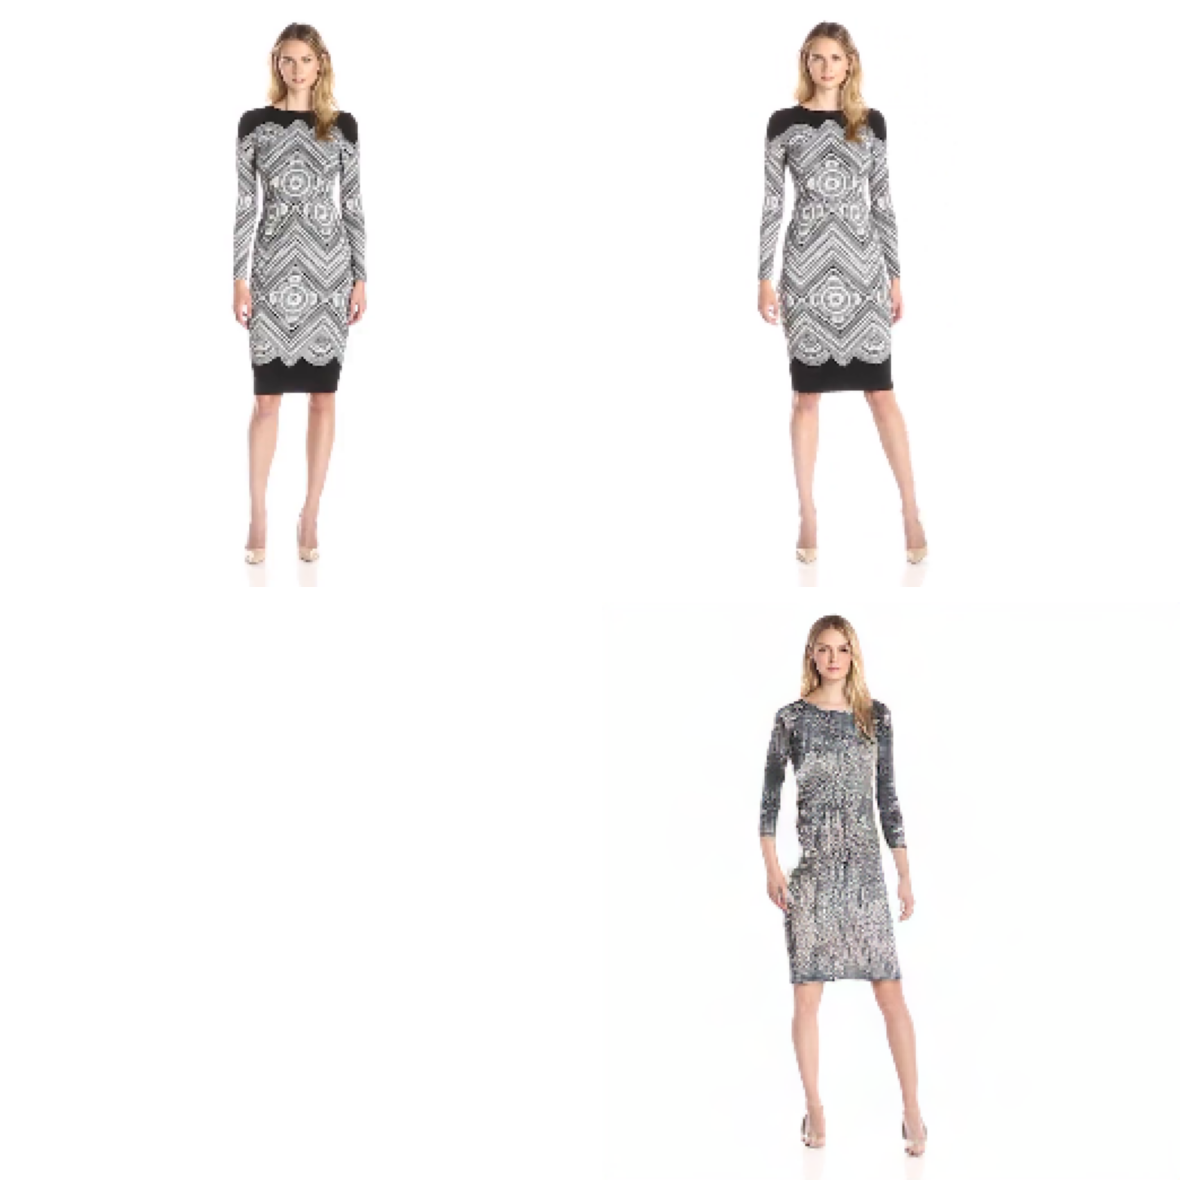

In [90]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Specify the paths of the two images
ori_image_path1 = '/ssd5/tongkai/FashionVideo/test/91EfnBTEE2S.mp4/frames/frame_00001.png'
ori_image_path2 = '/ssd5/tongkai/FashionVideo/test/91EfnBTEE2S.mp4/frames/frame_00101.png'
image_path2 = '/ssd5/tongkai/gen_fashion/nted_old/images/91EfnBTEE2S.mp4/frame_00101.png'
# image_path2 = '/ssd5/tongkai/gen_fashion/nted_old/images/91-3003CN5S.mp4/frame_00006.png'

# Load the images
ori_image1 = np.array(Image.open(ori_image_path1))
ori_image2 = np.array(Image.open(ori_image_path2))
image2 = np.array(Image.open(image_path2))

# Create a figure with GridSpec to arrange the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot the images in their respective subplots
axes[0, 0].imshow(ori_image1)
axes[0, 0].axis('off')
# axes[0, 0].set_title('Original Image 1')

axes[0, 1].imshow(ori_image2)
axes[0, 1].axis('off')
# axes[0, 1].set_title('Original Image 2')

axes[1, 0].axis('off')
axes[1, 1].imshow(image2)
axes[1, 1].axis('off')
# axes[1, 1].set_title('Image 2')


# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()

